In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
#LOADING DATASET
train_path = 'C:/Users/Lenovo/Desktop/Weed_CNN/WeedCrop.v1i.yolov5pytorch/train'
valid_path = 'C:/Users/Lenovo/Desktop/Weed_CNN/WeedCrop.v1i.yolov5pytorch/valid'
test_path = 'C:/Users/Lenovo/Desktop/Weed_CNN/WeedCrop.v1i.yolov5pytorch/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(244,244), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(244,244), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(244,244), batch_size=10, shuffle=False)

Found 2469 images belonging to 2 classes.
Found 235 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


Found 2469 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


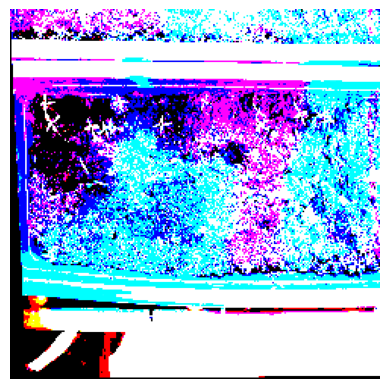

In [5]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your paths
train_path = 'C:/Users/Lenovo/Desktop/Weed_CNN/WeedCrop.v1i.yolov5pytorch/train'

# Generate train batches
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(244,244), batch_size=10)

# Get a batch of images from train_batches
images, labels = next(train_batches)

# Select a random index from the batch
idx = random.randint(0, len(images)-1)

# Plot the selected image
plt.imshow(images[idx])
plt.axis('off')
plt.show()


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# MODEL
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 3)),
    MaxPooling2D((2, 2)),
          
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
# Assuming x_train and Y_train are already defined or loaded
# ...

# Compile the model (if not compiled already)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using the train_batches directly
model.fit(train_batches, epochs=5, batch_size=10)


Epoch 1/5
247/247 [==============================] - 91s 362ms/step - loss: 15.5728 - accuracy: 0.5000
Epoch 2/5
247/247 [==============================] - 86s 347ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/5
247/247 [==============================] - 87s 352ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/5
247/247 [==============================] - 85s 342ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/5
247/247 [==============================] - 88s 355ms/step - loss: 0.6931 - accuracy: 0.5000


In [37]:
model.evaluate(train_batches)

247/247 [==============================] - 36s 144ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931484341621399, 0.5]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


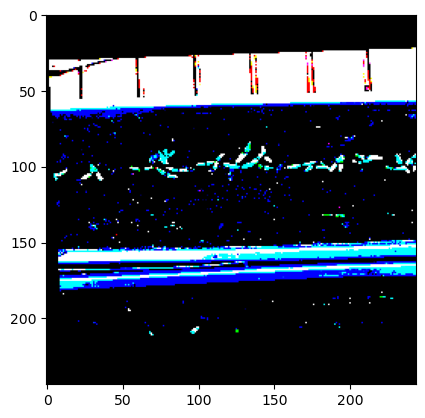

1/1 [==============================] - 0s 56ms/step
Predictions: [[2.0091702e-18]]
Our model says it is a: crop


In [12]:
# Making Predictions
batch = next(train_batches)  # Get the next batch
idx_in_batch = random.randint(0, len(batch[0]) - 1)  # Randomly select an image index within the batch

# Display a random image from the batch
plt.imshow(batch[0][idx_in_batch])
plt.show()

# Reshape the image for prediction
image_for_prediction = batch[0][idx_in_batch].reshape(1, 244, 244, 3)
train_batches_pred = model.predict(image_for_prediction)

# Print the predictions
print("Predictions:", train_batches_pred)

train_batches_pred = train_batches_pred > 0.5

if(train_batches_pred == 0):
    pred = 'crop'
else:
    pred = 'weed'
    
print("Our model says it is a:", pred)




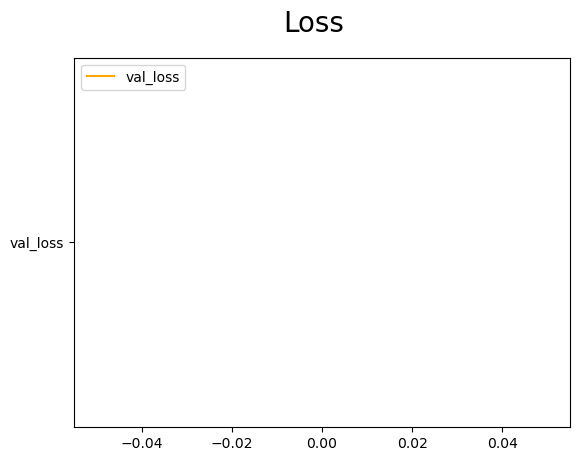

In [20]:
fig = plt.figure()
plt.plot(['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()                                     